In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q itables
!pip install -q torchviz

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Tahlildadeh"

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Read the Excel file
df = pd.read_excel(f'{data_path}/Concrete_Data.xlsx')

# Check the shape of the dataset
df.shape


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1030, 9)

In [4]:
import torch
from torchviz import make_dot
from torchvision import datasets
from torch import optim
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import requests
import cv2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
device

'cuda'

In [6]:
df

Cement   Blast Furnace Slag  Fly Ash  Water    Superplasticizer   \
0       540.0                 0.0      0.0    162.0                2.5   
1       540.0                 0.0      0.0    162.0                2.5   
2       332.5               142.5      0.0    228.0                0.0   
3       332.5               142.5      0.0    228.0                0.0   
4       198.6               132.4      0.0    192.0                0.0   
...       ...                 ...      ...      ...                ...   
1025    276.4               116.0     90.3    179.6                8.9   
1026    322.2                 0.0    115.6    196.0               10.4   
1027    148.5               139.4    108.6    192.7                6.1   
1028    159.1               186.7      0.0    175.6               11.3   
1029    260.9               100.5     78.3    200.6                8.6   

      Coarse Aggregate    Fine Aggregate  Age   Concrete compressive strength  
0                 1040.0           676.0    28                      79.986111  
1                 1055.0           676.0    28                      61.887366  
2                  932.0           594.0   270                      40.269535  
3                  932.0           594.0   365                      41.052780  
4                  978.4           825.5   360                      44.296075  
...                  ...             ...   ...                            ...  
1025               870.1           768.3    28                      44.284354  
1026               817.9           813.4    28                      31.178794  
1027               892.4           780.0    28                      23.696601  
1028               989.6           788.9    28                      32.768036  
1029               864.5           761.5    28                      32.401235  

[1030 rows x 9 columns]

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X.shape, y.shape

((1030, 8), (1030,))

In [8]:
df.columns

Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64


In [11]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit and transform the scaler on the training target
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))  # Reshape y_train to 2D for fitting
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))  # Reshape y_test to 2D for transforming

# Convert the scaled y_train and y_test back to 1D arrays
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()



In [12]:
X.shape

(1030, 8)

In [13]:
y_test_scaled.shape

(206,)

In [14]:
y_test_scaled

array([0.63010016, 0.66731949, 0.89907059, 0.41074404, 0.10220069,
       0.52265973, 0.26609287, 0.5361542 , 0.43694274, 0.57949802,
       0.28361594, 0.10463159, 0.47173118, 0.59138621, 0.38214022,
       0.24400007, 0.47001323, 0.21202048, 0.43402223, 0.38317099,
       0.36191139, 0.44381453, 0.57790032, 0.05694137, 0.45188888,
       0.35525434, 0.11010325, 0.48238245, 0.63072721, 0.13570066,
       0.62256696, 0.46436118, 0.6170867 , 0.79848477, 0.15708911,
       0.38231201, 0.36513254, 0.46207631, 0.14118092, 0.61827209,
       0.16499167, 0.04919342, 0.44529197, 0.59679775, 0.09593018,
       0.76077583, 0.66302462, 0.42130942, 0.24195571, 0.03109485,
       0.68372588, 0.56623546, 0.33738769, 0.12509234, 0.76850659,
       0.39949149, 0.28705183, 0.14179938, 0.36607741, 0.2171915 ,
       0.46202477, 0.13939425, 0.41125943, 0.55402086, 0.38212304,
       0.19557113, 0.38705355, 0.12264426, 0.31556976, 0.27528389,
       0.11615042, 0.27052518, 0.08691096, 0.28370183, 0.29667

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self,data, target):
    self.data = torch.tensor(data.astype(float), dtype = torch.float32)
    self.target = torch.tensor(target.astype(float), dtype = torch.float32)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.target[idx]


train_dataset = CustomDataset(X_train_scaled, y_train_scaled)
test_dataset = CustomDataset(X_test_scaled, y_test_scaled)
train_loader = DataLoader(dataset = train_dataset, batch_size= 16, shuffle= True, num_workers= 3)
test_loader = DataLoader(dataset= test_dataset, batch_size= 16, shuffle= False, num_workers=3)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [16]:
from torch import optim
from torch import nn
import torch

class ManualRegression(nn.Module):
  def __init__(self, in_features, hidden_size1 = 200, hidden_size2 = 300, hidden_size3 = 100):
    super().__init__()
    self.fc1 = nn.Linear(in_features,hidden_size1)
    self.fc2 = nn.Linear(hidden_size1,hidden_size2)
    self.fc3 = nn.Linear(hidden_size2,hidden_size3)
    self.fc4 = nn.Linear(hidden_size3,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    return x

In [17]:
import warnings
warnings.filterwarnings('ignore')

8
Epoch 10/200, Train Loss:  5.8966, Validate Loss: 5.5836
Epoch 20/200, Train Loss:  5.8702, Validate Loss: 5.5536
Epoch 30/200, Train Loss:  5.8742, Validate Loss: 5.5439
Epoch 40/200, Train Loss:  5.8818, Validate Loss: 5.5414
Epoch 50/200, Train Loss:  5.8610, Validate Loss: 5.5579
Epoch 60/200, Train Loss:  5.8732, Validate Loss: 5.5406
Epoch 70/200, Train Loss:  5.8408, Validate Loss: 5.5404
Epoch 80/200, Train Loss:  5.8869, Validate Loss: 5.5400
Epoch 90/200, Train Loss:  5.9174, Validate Loss: 5.5505
Epoch 100/200, Train Loss:  5.8473, Validate Loss: 5.5409
Epoch 110/200, Train Loss:  5.8932, Validate Loss: 5.5705
Epoch 120/200, Train Loss:  5.8594, Validate Loss: 5.5592
Epoch 130/200, Train Loss:  5.8628, Validate Loss: 5.5379
Epoch 140/200, Train Loss:  5.8871, Validate Loss: 5.5380
Epoch 150/200, Train Loss:  5.8757, Validate Loss: 5.5536
Epoch 160/200, Train Loss:  5.8812, Validate Loss: 5.5371
Epoch 170/200, Train Loss:  5.8763, Validate Loss: 5.5430
Epoch 180/200, Train 

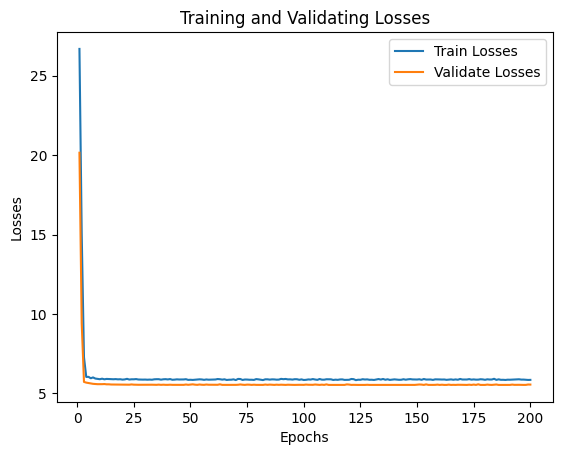

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
in_features = X_train_scaled.shape[1]
print(in_features)
lr = 1e-3
model = ManualRegression(in_features, 8,5,3).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()
n_epochs = 200
train_losses, val_losses = [], []

def train(model, data_loader,loss_fn, optimizer):
    model.train()
    total_loss = 0.0
    for inputs, targets in data_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = loss_fn(outputs, targets)
      total_loss += loss.item()  # tensor adadi ra tabdil be scalar mikonad.
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    return total_loss/len(data_loader)

def validate(model, data_loader,loss_fn):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in data_loader:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          loss = loss_fn(outputs, targets)
          total_loss += loss.item()
    return total_loss/len(data_loader)

for epoch in range(1,n_epochs+1):
    train_loss = train(model,train_loader, loss_fn, optimizer)
    val_loss = validate(model, test_loader, loss_fn)
    train_loss = scaler.inverse_transform(np.array(train_loss).reshape(-1,1))
    val_loss = scaler.inverse_transform(np.array(val_loss).reshape(-1,1))
    train_losses.append(train_loss[0][0])
    val_losses.append(val_loss[0][0])
    if epoch % 10 == 0:
      print(f'Epoch {epoch}/{n_epochs}, Train Loss:  {train_loss[0][0]:.4f}, Validate Loss: {val_loss[0][0]:.4f}')

plt.plot(range(1,n_epochs+1),train_losses, label = 'Train Losses' )
plt.plot(range(1,n_epochs+1),val_losses, label = 'Validate Losses' )
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training and Validating Losses')
plt.legend()
plt.show()

In [19]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.5533,  0.3868,  0.0313,  0.0883,  0.0172, -0.1104,  0.1975,  0.2077],
                      [-0.2586, -0.3052, -0.0296,  0.2839,  0.1015,  0.0345,  0.2134, -0.0064],
                      [-0.2451, -0.3185, -0.0968, -0.0463,  0.2274, -0.0791, -0.0374, -0.0676],
                      [-0.1112,  0.2527,  0.2294, -0.2357, -0.2621, -0.2393, -0.3332, -0.2192],
                      [-0.3279,  0.0458, -0.1158, -0.2300,  0.3327, -0.0832, -0.3348, -0.1437],
                      [-0.0444,  0.0634,  0.0756,  0.1041,  0.3288,  0.3436,  0.2911,  0.0493],
                      [-0.0916, -0.2716, -0.4074, -0.1262,  0.1019,  0.0142,  0.0796,  0.3645],
                      [ 0.0496,  0.1172, -0.2255, -0.2005,  0.2886, -0.0498,  0.3271, -0.5634]],
                     device='cuda:0')),
             ('fc1.bias',
              tensor([ 0.0040, -0.3096,  0.0546, -0.3025,  0.0480,  0.3293,  0.0193,  0.0854],
                     device='cuda:0')),
  